In [49]:
!pip install vaderSentiment

In [50]:
# Dependencies
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import seaborn as sns
from config import *

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [51]:
 # Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [52]:
# News outlets
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

In [53]:
tweet_data = {
    "tweet_source":[],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}
counter = 1

# Variables for holding sentiments
sentiments = []


# Loop through all news sources

for source in news_source:

    # Grabing the tweets (100)
    tweets = api.user_timeline(source, count=100)

    for tweet in tweets:

        # All the data is grabbed from the JSON returned by Twitter
        tweet_data["tweet_source"].append(tweet["user"]["name"])
        tweet_data["tweet_text"].append(tweet["text"])
        tweet_data["tweet_date"].append(tweet["created_at"])

        # Run sentiment analysis on each tweet using vader
        tweet_data["tweet_vader_score"].append(analyzer.polarity_scores(tweet["text"])["compound"])
        tweet_data["tweet_pos_score"].append(analyzer.polarity_scores(tweet["text"])["pos"])
        tweet_data["tweet_neu_score"].append(analyzer.polarity_scores(tweet["text"])["neu"])
        tweet_data["tweet_neg_score"].append(analyzer.polarity_scores(tweet["text"])["neg"])



In [54]:
twitterdataframe = pd.DataFrame(tweet_data)

In [55]:
twitterdataframe['# of Tweets Ago'] = twitterdataframe.index % 100
twitterdataframe

,tweet_date,tweet_neg_score,tweet_neu_score,tweet_pos_score,tweet_source,tweet_text,tweet_vader_score,# of Tweets Ago
0,Fri Jun 15 06:45:00 +0000 2018,0.306,0.694,0.000,Fox News,Florida man drops meth off at sheriff's office...,-0.7650,0
1,Fri Jun 15 06:30:00 +0000 2018,0.479,0.521,0.000,Fox News,Wisconsin teen with disabilities suffered 'slo...,-0.8779,1
2,Fri Jun 15 06:15:00 +0000 2018,0.362,0.638,0.000,Fox News,Arkansas highway drenched in Fireball whiskey ...,-0.6249,2
3,Fri Jun 15 05:59:00 +0000 2018,0.163,0.769,0.068,Fox News,".@PressSec on immigration: ""The separation of ...",-0.4767,3
4,Fri Jun 15 05:45:00 +0000 2018,0.000,1.000,0.000,Fox News,'I've never seen anything that big before'\n\n...,0.0000,4
5,Fri Jun 15 05:30:00 +0000 2018,0.139,0.861,0.000,Fox News,MMA star McGregor says he feels remorse after ...,-0.2732,5
6,Fri Jun 15 05:16:00 +0000 2018,0.000,1.000,0.000,Fox News,House leadership's text of new immigration bil...,0.0000,6
7,Fri Jun 15 05:01:01 +0000 2018,0.000,1.000,0.000,Fox News,"Alabama sisters give birth on the same day, ar...",0.0000,7
8,Fri Jun 15 04:45:00 +0000 2018,0.250,0.750,0.000,Fox News,Oklahoma police officer saves choking boy in d...,-0.4588,8
9,Fri Jun 15 04:30:00 +0000 2018,0.000,1.000,0.000,Fox News,.@POTUS blasts the Russia allegations as a 'pi...,0.0000,9


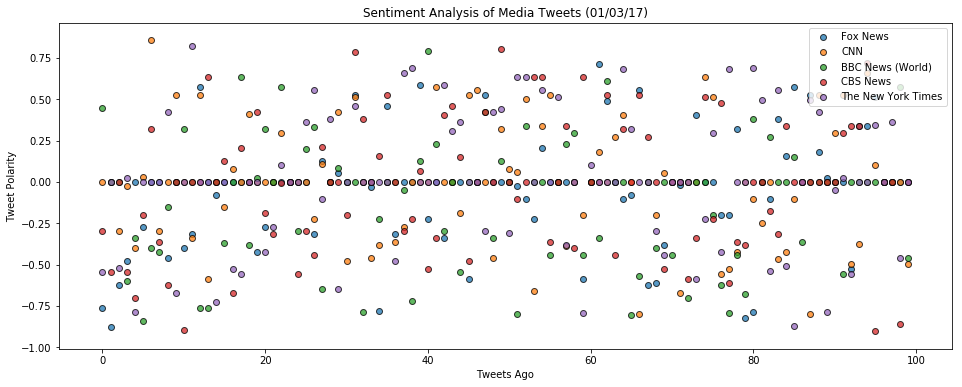

In [56]:
# twitterdataframe["tweet_vader_score"] ,# Obtain the source names for reference

news_orgs = twitterdataframe['tweet_source'].unique().tolist()

plt.figure(figsize=(16,6))

for org in news_orgs:
    
    df = twitterdataframe[twitterdataframe['tweet_source'] == org]
    
    plt.scatter(df["# of Tweets Ago"], df["tweet_vader_score"], marker="o", edgecolors="black", alpha=0.75)

plt.legend(news_orgs, loc='upper right')
plt.title('Sentiment Analysis of Media Tweets (01/03/17)')
plt.ylabel('Tweet Polarity')
plt.xlabel('Tweets Ago')

plt.show()
plt.savefig("Fig1.png")

In [57]:
# Export to CSV
file_name = str(time.strftime("%m-%d-%y")) + "-tweets.csv"
twitterdataframe.to_csv("social_analytics.csv", encoding='utf-8')
